# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

A major proportion of retail bank profit comes from interests in the form of home loans. These loans
are borrowed by regular income/high-earning customers. Banks are most fearful of defaulters, as
bad loans (NPA) usually eat up a major chunk of their profits. Therefore, it is important for banks to
be judicious while approving loans for their customer base.
The approval process for the loans is multifaceted. Through this process, the bank tries to check the
creditworthiness of the applicant on the basis of a manual study of various aspects of the
application. The entire process is not only eﬀort-intensive but also prone to wrong
judgment/approval owing to human error and biases.
There have been attempts by many banks to automate this process by using heuristics. But with the
advent of data science and machine learning, the focus has shifted to building machines that can 
learn this approval process and make it free of biases and more eﬃcient. At the same time, one
important thing to keep in mind is to make sure that the machine does not learn the biases that
previously crept in because of the human approval process.

### **The objective:**

The objective of this project is to develop a predictive classification model that can accurately forecast the likelihood of a customer defaulting on their home loan. The model will be trained using historical loan data and will provide recommendations to the bank on key features that should be considered when approving or rejecting a loan application. Ultimately, the goal is to automate and improve the decision-making process, reduce human biases, and identify potential defaulters, thus ensuring more accurate and efficient loan approval processes.

### **The key questions:**

* Which factors (features) most significantly contribute to a customer's likelihood of defaulting on a loan?
* Can a predictive model accurately distinguish between applicants who will default and those who will not?
* How can the bank automate the decision-making process while ensuring fairness and preventing biases that might have existed in the traditional manual loan approval system?
* What is the impact of the chosen features on the probability of loan default?
* How well can the model generalize to unseen data (i.e., new applicants)?

### **The problem formulation**:

The problem being solved with data science is the prediction of loan defaults based on historical data. More specifically, the task is to build a machine learning classification model that predicts whether a customer will default on their loan or not. The model will be trained using a variety of customer attributes and past behavior. The goal is to accurately classify future loan applicants into either "likely to default" or "not likely to default" categories, thereby enabling the bank to make more informed and efficient loan approval decisions. The challenge also lies in ensuring that the model is interpretable, provides reasons for decisions, and avoids reinforcing any existing biases present in the data.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
from scipy.stats import (
    skew,
    ttest_ind
)

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to show the graphs in the notebook
%matplotlib inline

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Sets the limit for the maximum number of columns rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# import libraries for building models
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV
)
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [3]:
data = pd.read_csv('hmeq.csv')
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
data.shape

(5960, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [6]:
data.isna().sum() / len(data) * 100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

In [7]:
data.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [8]:
for i in data:
    print(data[i].value_counts())
    print('*' * 50)

BAD
0    4771
1    1189
Name: count, dtype: int64
**************************************************
LOAN
15000    105
10000     81
20000     74
25000     73
12000     69
17000     51
13000     50
5000      50
11000     47
8000      44
18000     40
16000     39
7000      37
16500     37
7500      36
12900     34
13900     34
10600     34
12300     33
22400     33
10800     33
12800     33
9000      33
12500     32
15200     32
15300     31
15900     31
10200     31
13700     31
12100     31
8200      30
15700     30
8400      30
13300     30
11100     30
18600     29
14900     29
14000     29
8700      29
13500     29
17200     29
15800     29
9400      28
6000      28
10500     28
9900      28
15500     28
11700     28
11900     28
23500     28
19000     28
16400     27
21000     27
12700     27
13600     27
21700     26
9800      26
15100     26
9300      26
8500      26
17400     25
23000     25
10100     25
12600     25
15400     25
20500     25
16200     25
18900     25
16100     

In [9]:
for i in data:
    print(data[i].value_counts(normalize = True))
    print('*' * 50)

BAD
0    0.800503
1    0.199497
Name: proportion, dtype: float64
**************************************************
LOAN
15000    0.017617
10000    0.013591
20000    0.012416
25000    0.012248
12000    0.011577
17000    0.008557
13000    0.008389
5000     0.008389
11000    0.007886
8000     0.007383
18000    0.006711
16000    0.006544
7000     0.006208
16500    0.006208
7500     0.006040
12900    0.005705
13900    0.005705
10600    0.005705
12300    0.005537
22400    0.005537
10800    0.005537
12800    0.005537
9000     0.005537
12500    0.005369
15200    0.005369
15300    0.005201
15900    0.005201
10200    0.005201
13700    0.005201
12100    0.005201
8200     0.005034
15700    0.005034
8400     0.005034
13300    0.005034
11100    0.005034
18600    0.004866
14900    0.004866
14000    0.004866
8700     0.004866
13500    0.004866
17200    0.004866
15800    0.004866
9400     0.004698
6000     0.004698
10500    0.004698
9900     0.004698
15500    0.004698
11700    0.004698
11900    0.0046

In [10]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BAD,5960.0,NaN,NaN,NaN,0.199497,0.399656,0.0,0.0,0.0,0.0,1.0
LOAN,5960.0,NaN,NaN,NaN,18607.969799,11207.480417,1100.0,11100.0,16300.0,23300.0,89900.0
MORTDUE,5442.0,NaN,NaN,NaN,73760.8172,44457.609458,2063.0,46276.0,65019.0,91488.0,399550.0
VALUE,5848.0,NaN,NaN,NaN,101776.048741,57385.775334,8000.0,66075.5,89235.5,119824.25,855909.0
REASON,5708,2,DebtCon,3928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JOB,5681,6,Other,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOJ,5445.0,NaN,NaN,NaN,8.922268,7.573982,0.0,3.0,7.0,13.0,41.0
DEROG,5252.0,NaN,NaN,NaN,0.25457,0.846047,0.0,0.0,0.0,0.0,10.0
DELINQ,5380.0,NaN,NaN,NaN,0.449442,1.127266,0.0,0.0,0.0,0.0,15.0
CLAGE,5652.0,NaN,NaN,NaN,179.766275,85.810092,0.0,115.116702,173.466667,231.562278,1168.233561


In [11]:
# Find the range of the 'LOAN' variable
loan_range = data['LOAN'].min(), data['LOAN'].max()
print(f"Loan amount range: {loan_range}")

Loan amount range: (1100, 89900)


## Observations from Summary Statistics

* The dataset has 5960 rows of data and 13 variables.
* There are 2 categorical variables and the remaining are numerical values.
* Except for the variables BAD and LOAN, every other variable has some missing values. There will have to be some missing value treatment that needs to be done before building a model.
* The lowest loan amount is 1100 USD and the highest is 89900 USD.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


In [12]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_box2.text(
        0.5, 1.05, f"Skewness: {skew(data[feature].dropna()):.2f}",
        horizontalalignment='center', verticalalignment='bottom',
        transform=ax_box2.transAxes, fontsize=12, color='blue', fontweight='bold'
    )
    plt.show()  #Showing the Plot

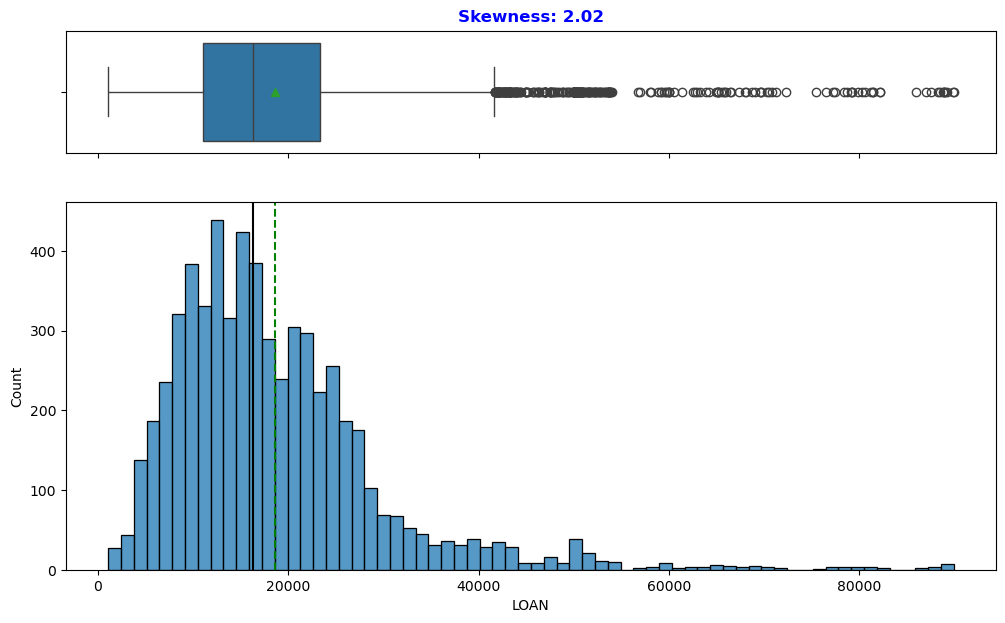

In [13]:
histogram_boxplot(data, 'LOAN')

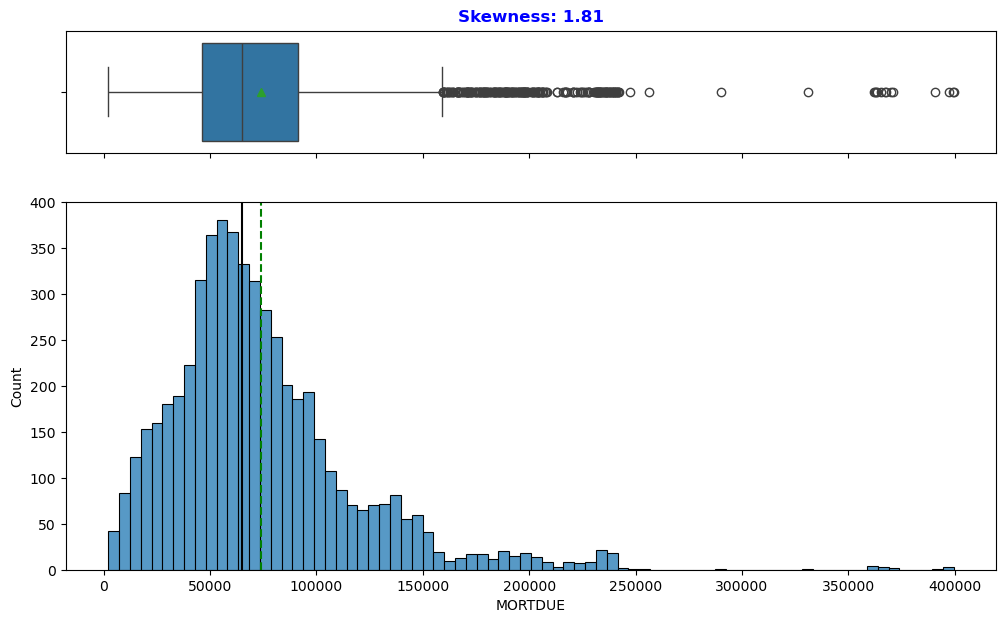

In [14]:
histogram_boxplot(data, 'MORTDUE')

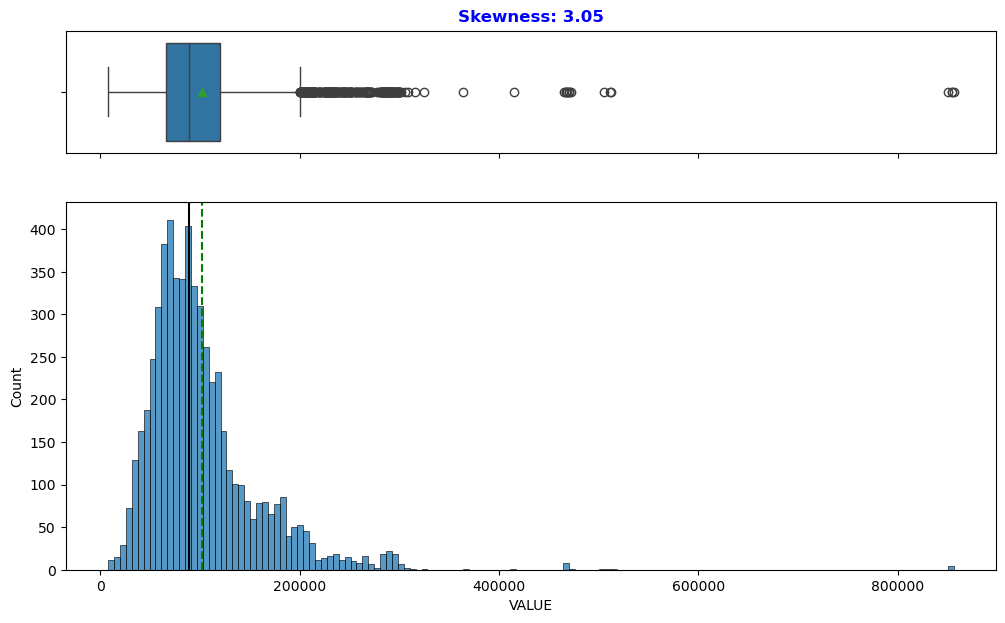

In [15]:
histogram_boxplot(data, 'VALUE')

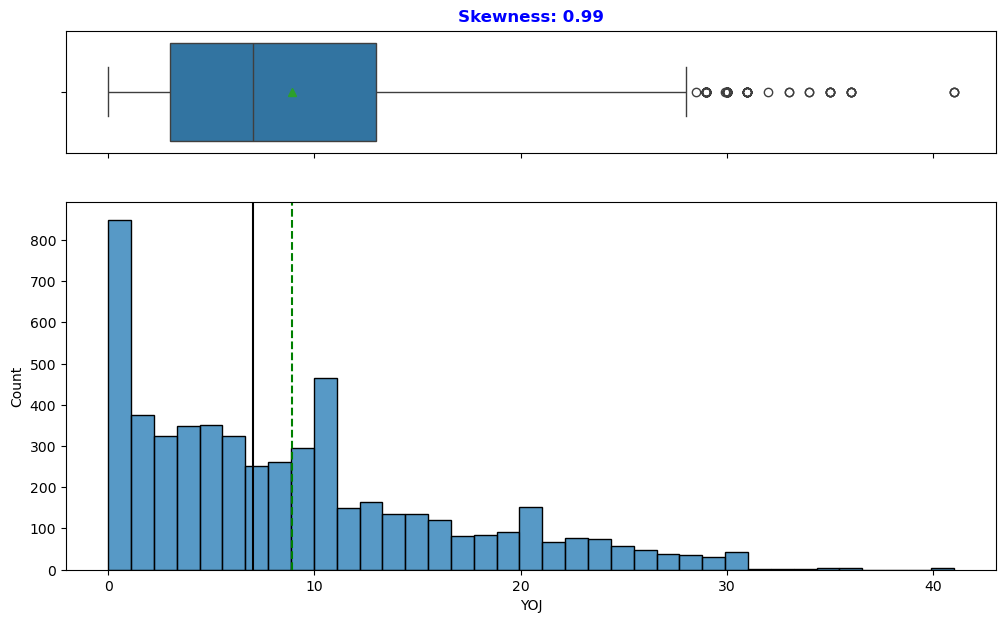

In [16]:
histogram_boxplot(data, 'YOJ')

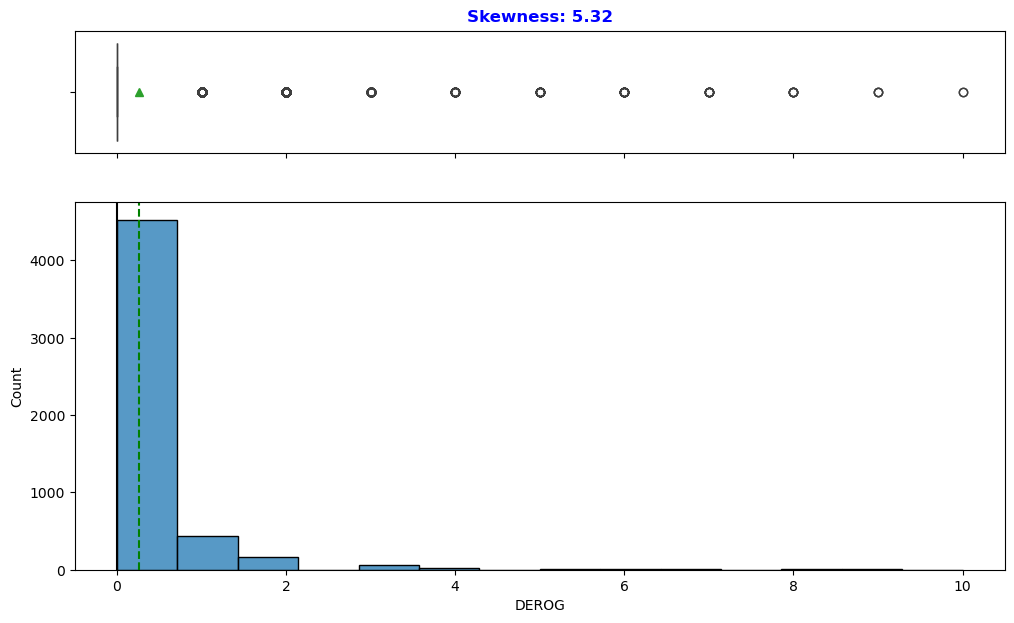

In [17]:
histogram_boxplot(data, 'DEROG')

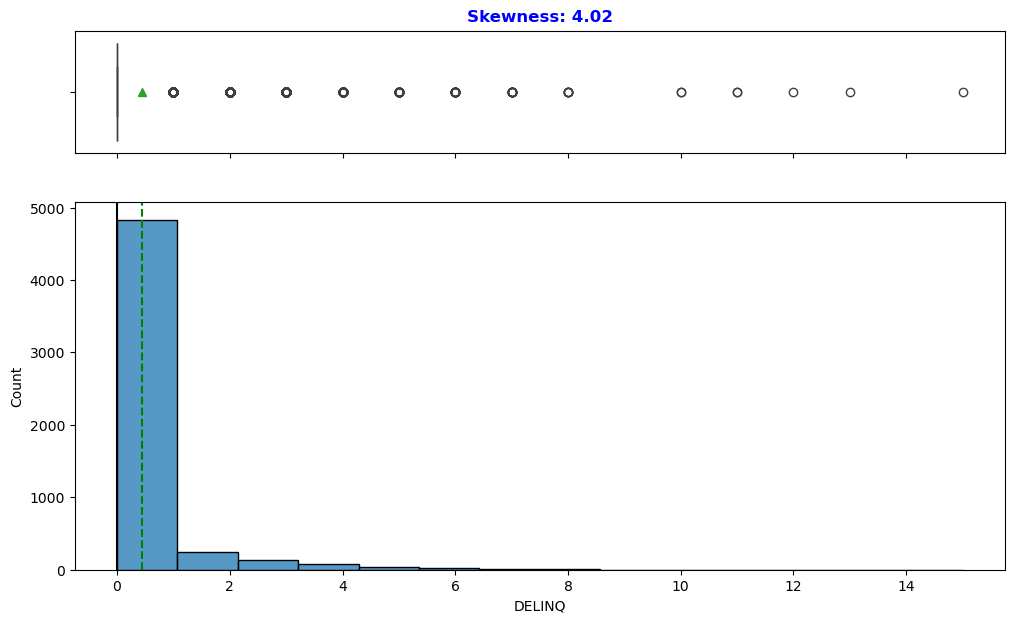

In [18]:
histogram_boxplot(data, 'DELINQ')

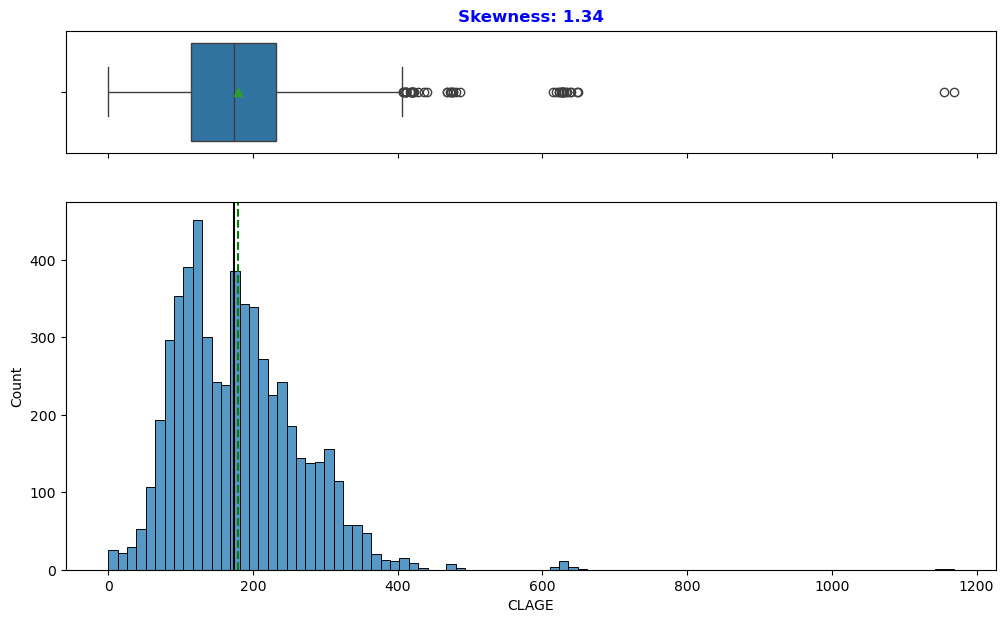

In [19]:
histogram_boxplot(data, 'CLAGE')

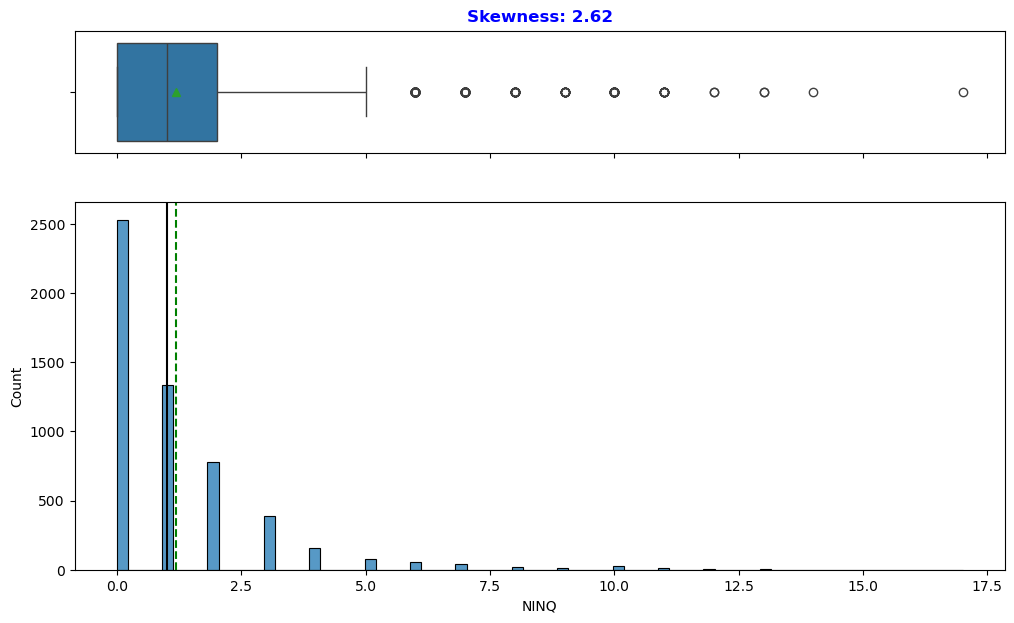

In [20]:
histogram_boxplot(data, 'NINQ')

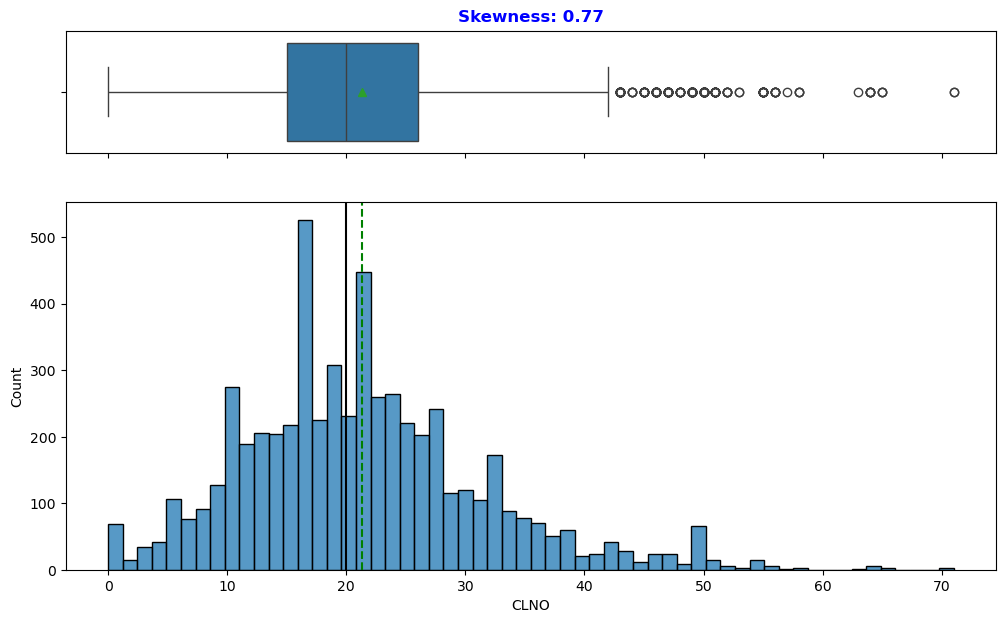

In [21]:
histogram_boxplot(data, 'CLNO')

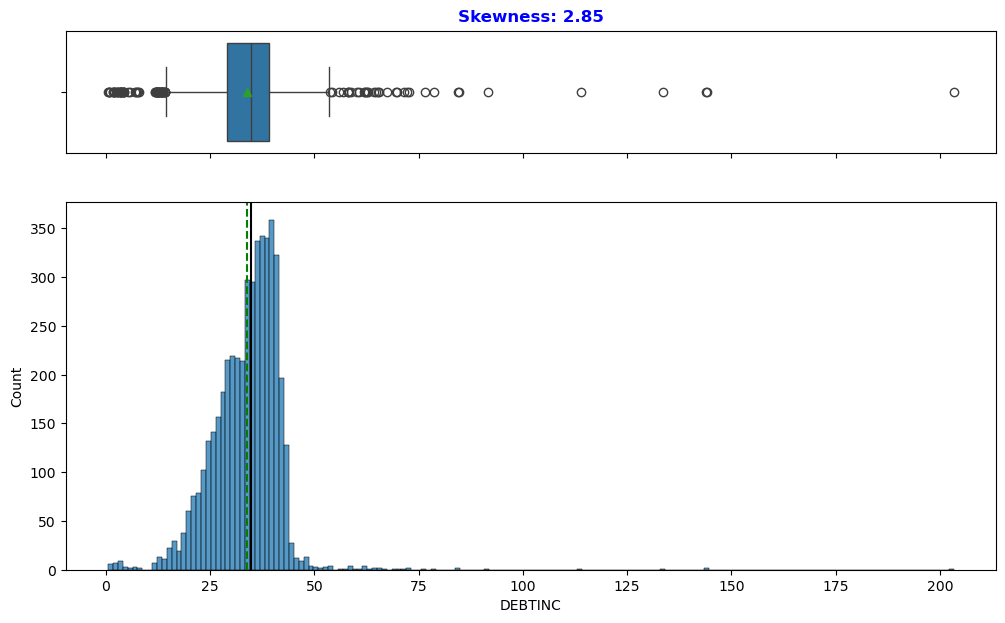

In [22]:
histogram_boxplot(data, 'DEBTINC')

In [23]:
def labeled_barplot(data, feature, perc=False):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    plt.figure(figsize=(count + 1, 5))
    
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired"
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

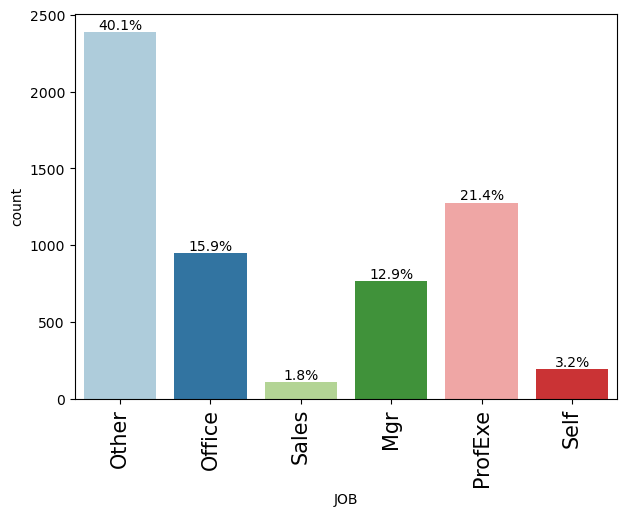

In [24]:
labeled_barplot(data, "JOB", perc=True)

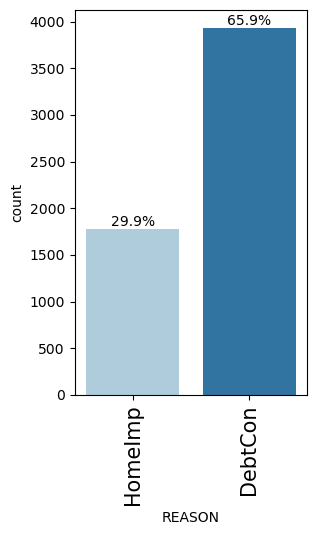

In [25]:
labeled_barplot(data, "REASON", perc=True)

### **Bivariate Analysis**

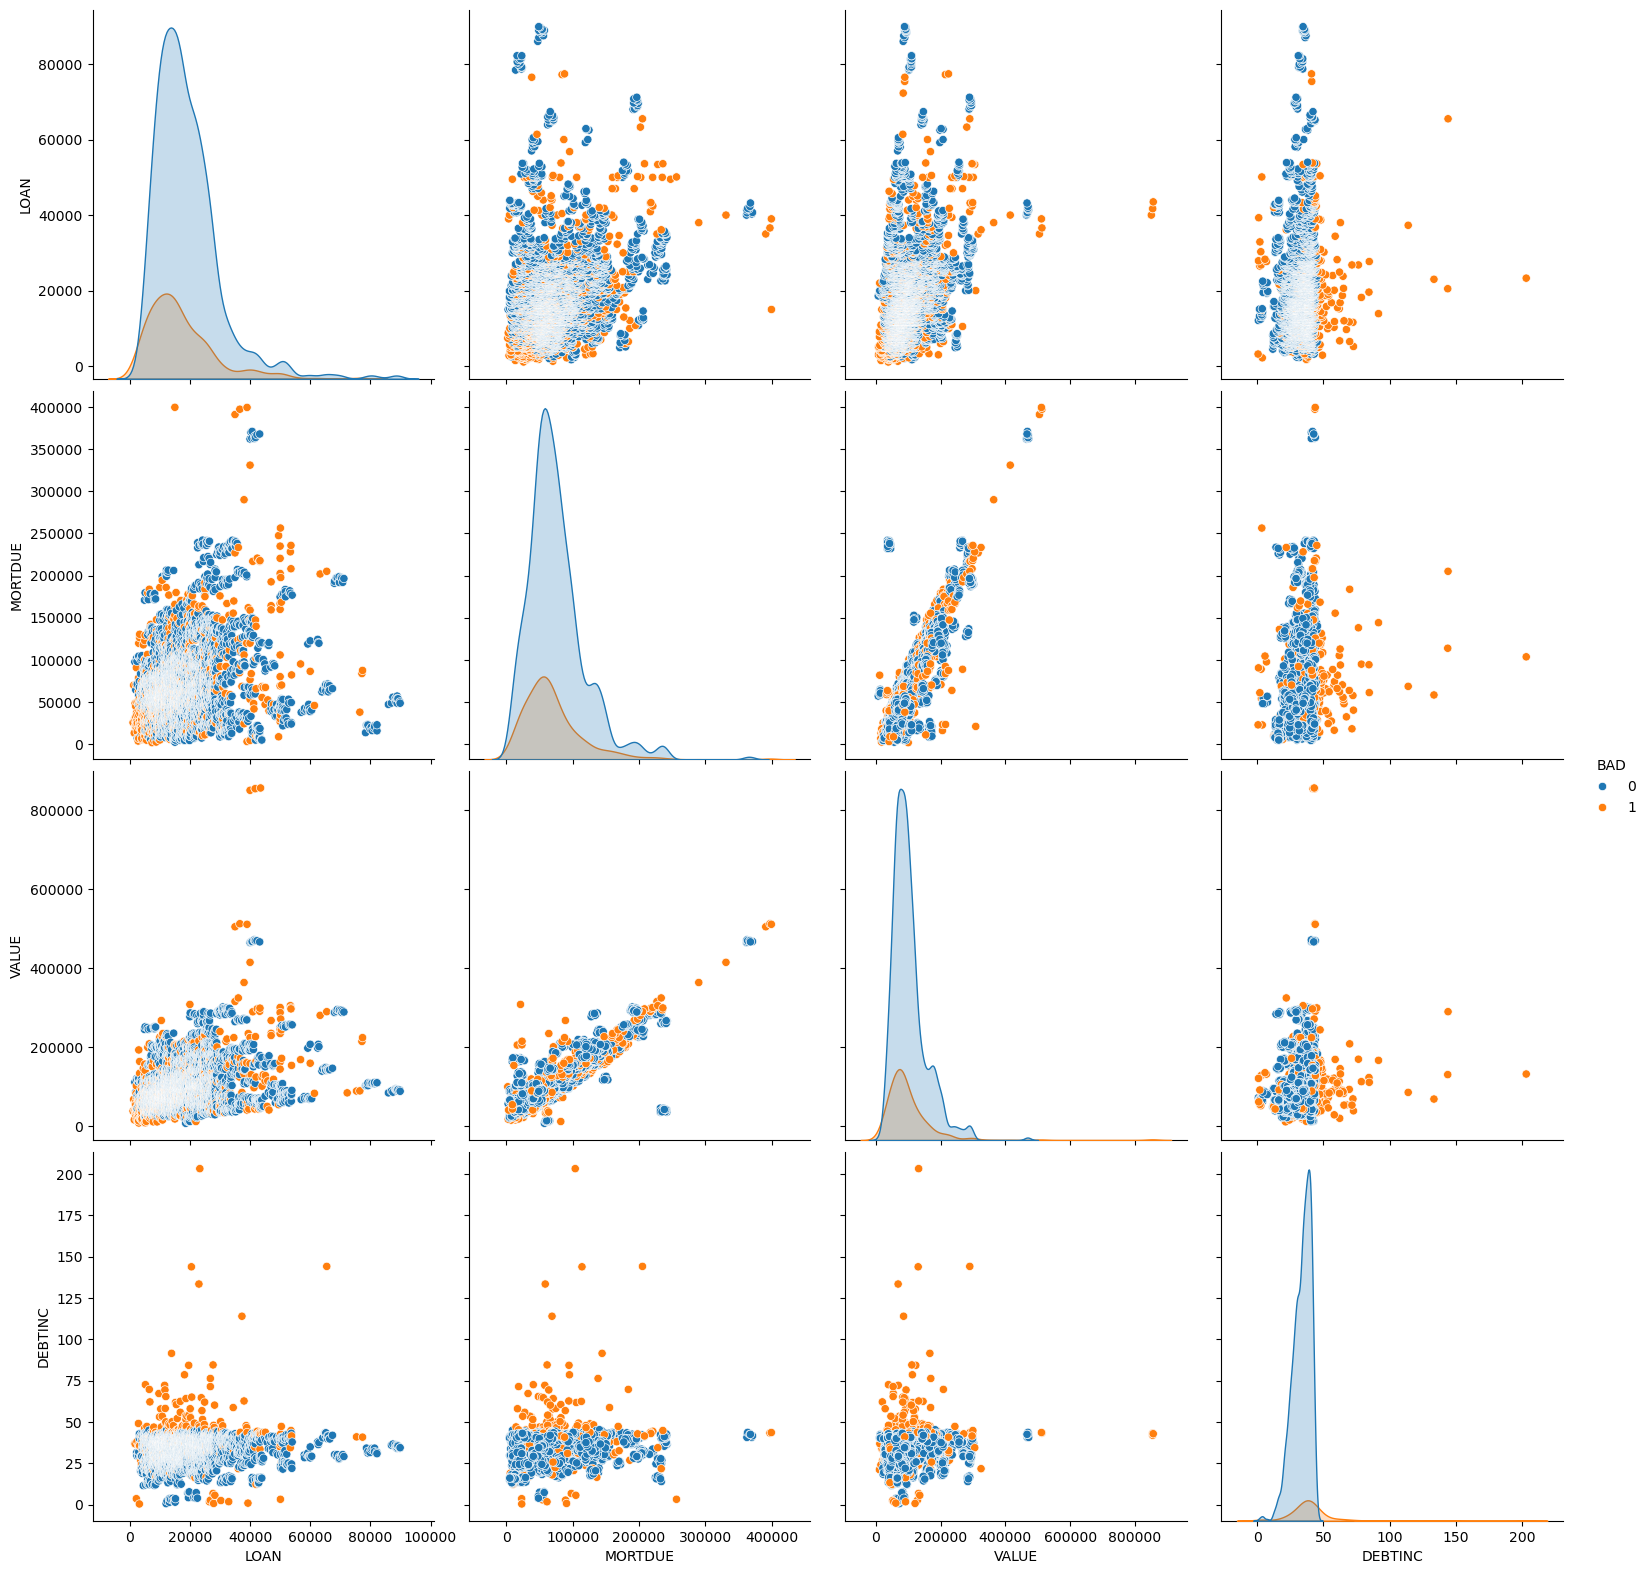

In [26]:
sns.pairplot(data[['LOAN', 'MORTDUE', 'VALUE', 'DEBTINC', 'BAD']], hue='BAD', height=4)
plt.show()

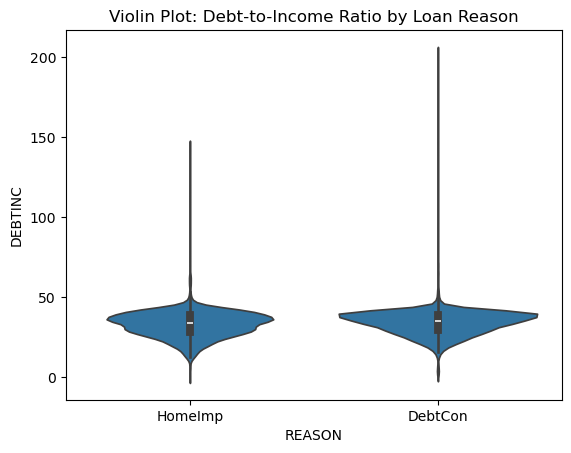

In [27]:
sns.violinplot(x='REASON', y='DEBTINC', data=data)
plt.title('Violin Plot: Debt-to-Income Ratio by Loan Reason')
plt.show()

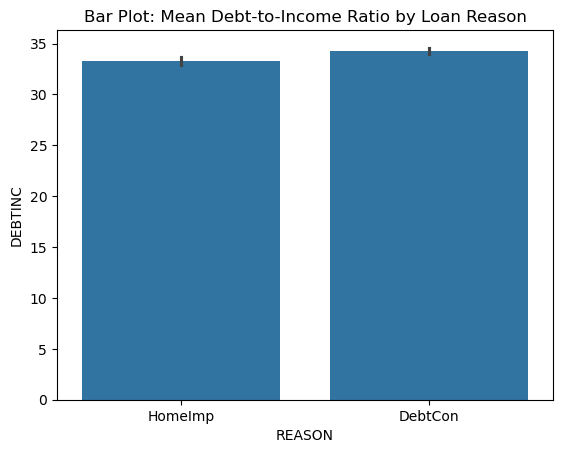

In [28]:
sns.barplot(x='REASON', y='DEBTINC', data=data)
plt.title('Bar Plot: Mean Debt-to-Income Ratio by Loan Reason')
plt.show()

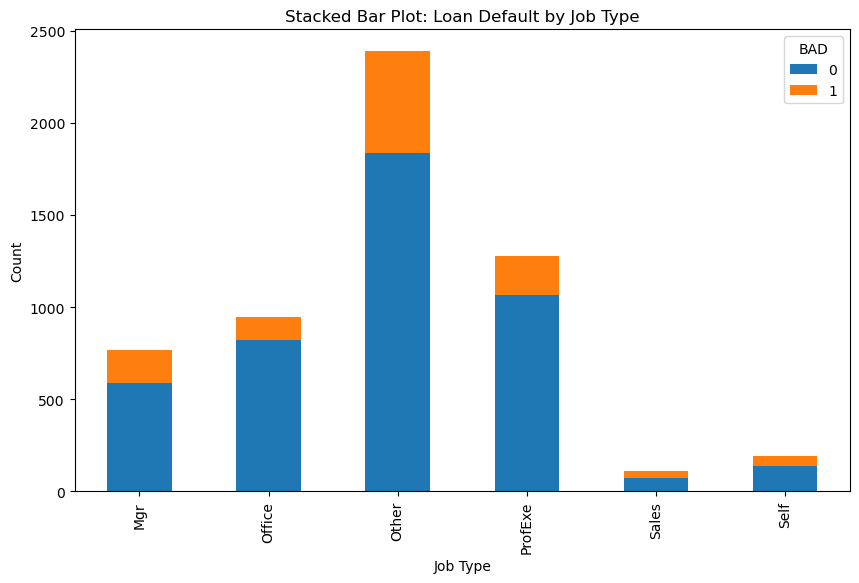

In [29]:
pd.crosstab(data['JOB'], data['BAD']).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot: Loan Default by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()

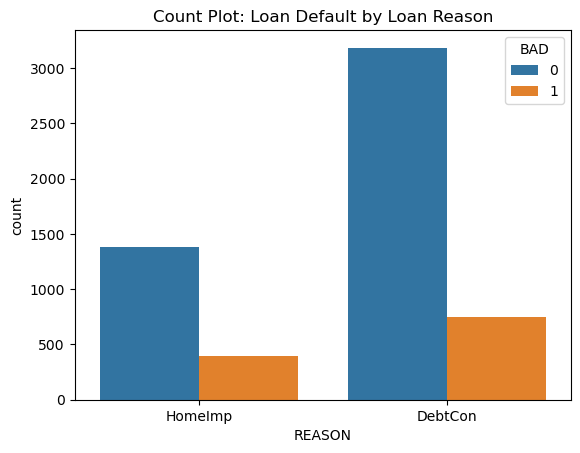

In [30]:
sns.countplot(x='REASON', hue='BAD', data=data)
plt.title('Count Plot: Loan Default by Loan Reason')
plt.show()

BAD             0         1
REASON                     
DebtCon  0.810336  0.189664
HomeImp  0.777528  0.222472


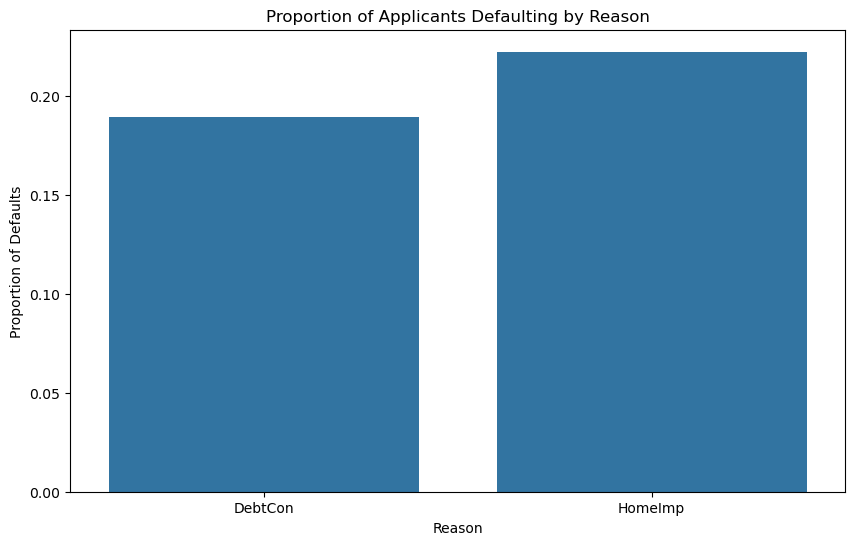

In [31]:
# Create a crosstab between 'REASON' and 'BAD' (default status)
reason_default_crosstab = pd.crosstab(data['REASON'], data['BAD'], normalize='index')
print(reason_default_crosstab)

# Visualize the proportions using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=reason_default_crosstab.index, y=reason_default_crosstab[1])
plt.title('Proportion of Applicants Defaulting by Reason')
plt.xlabel('Reason')
plt.ylabel('Proportion of Defaults')
plt.show()

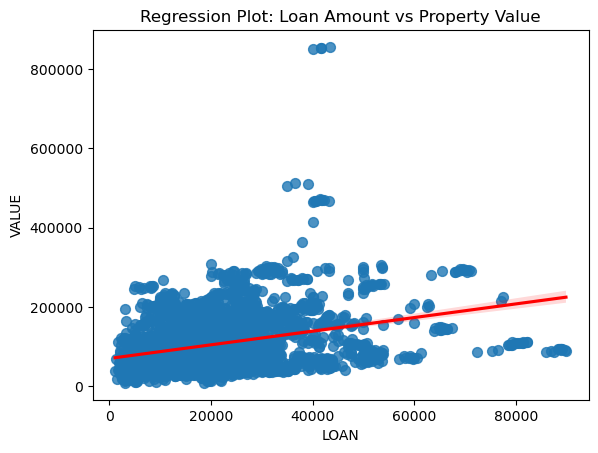

In [32]:
sns.regplot(x='LOAN', y='VALUE', data=data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Regression Plot: Loan Amount vs Property Value')
plt.show()

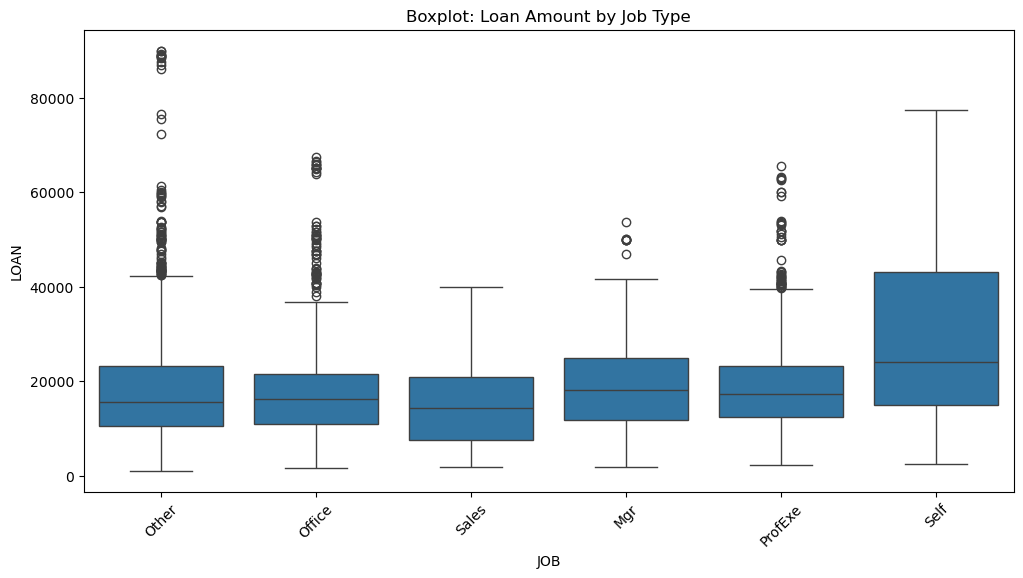

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='JOB', y='LOAN', data=data)
plt.title('Boxplot: Loan Amount by Job Type')
plt.xticks(rotation=45)
plt.show()

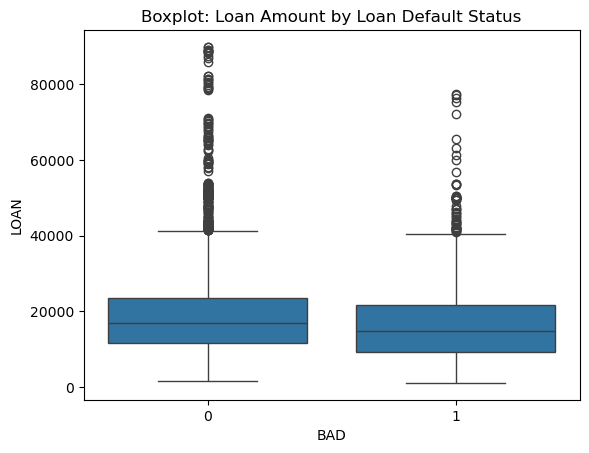

In [34]:
sns.boxplot(x='BAD', y='LOAN', data=data)
plt.title('Boxplot: Loan Amount by Loan Default Status')
plt.show()

In [35]:
# Find the range of the 'LOAN' variable
loan_range = data['LOAN'].min(), data['LOAN'].max()
print(f"Loan amount range: {loan_range}")

Loan amount range: (1100, 89900)


### **Multivariate Analysis**

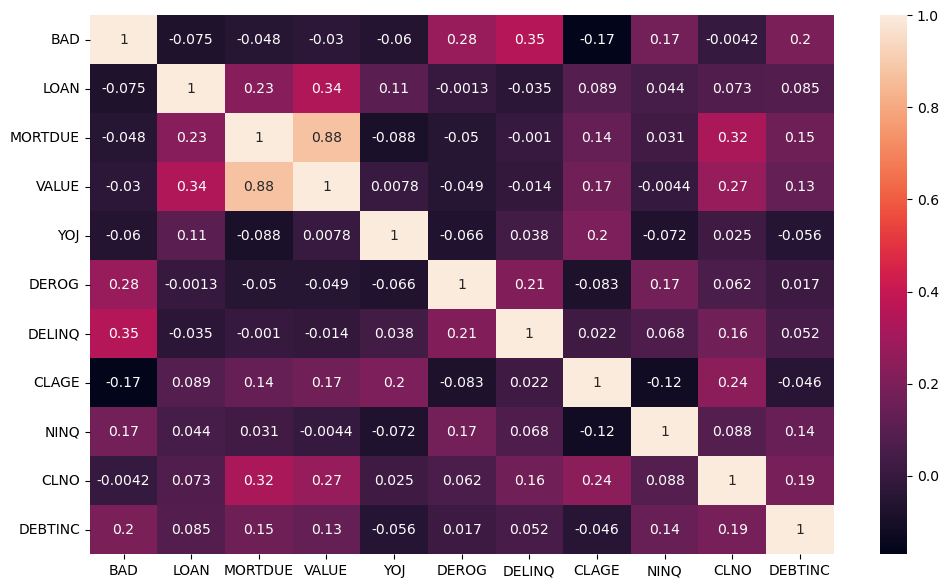

In [36]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True
)
plt.show()

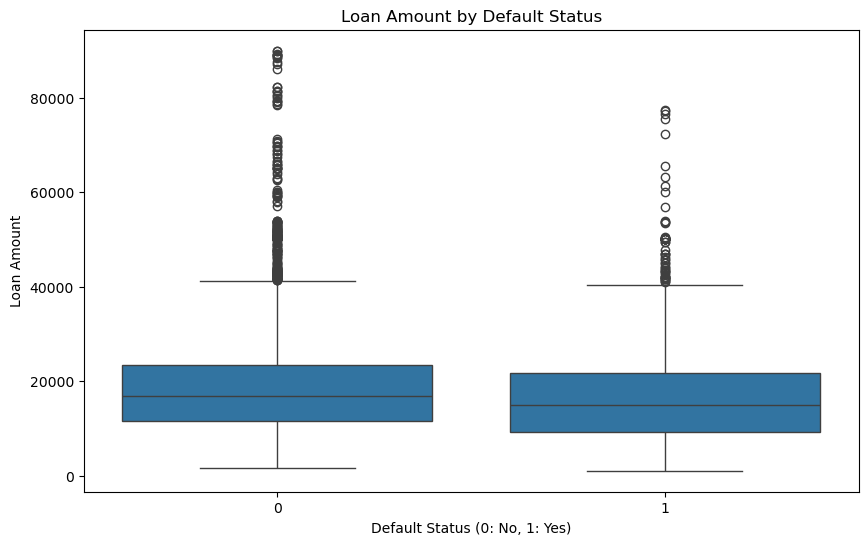

T-statistic: -5.81315745785895, P-value: 6.448273297751198e-09


In [37]:
# Boxplot for loan amounts by default status
plt.figure(figsize=(10, 6))
sns.boxplot(x='BAD', y='LOAN', data=data)
plt.title('Loan Amount by Default Status')
plt.xlabel('Default Status (0: No, 1: Yes)')
plt.ylabel('Loan Amount')
plt.show()

loan_default = data[data['BAD'] == 1]['LOAN']
loan_repaid = data[data['BAD'] == 0]['LOAN']

t_stat, p_value = ttest_ind(loan_default, loan_repaid)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

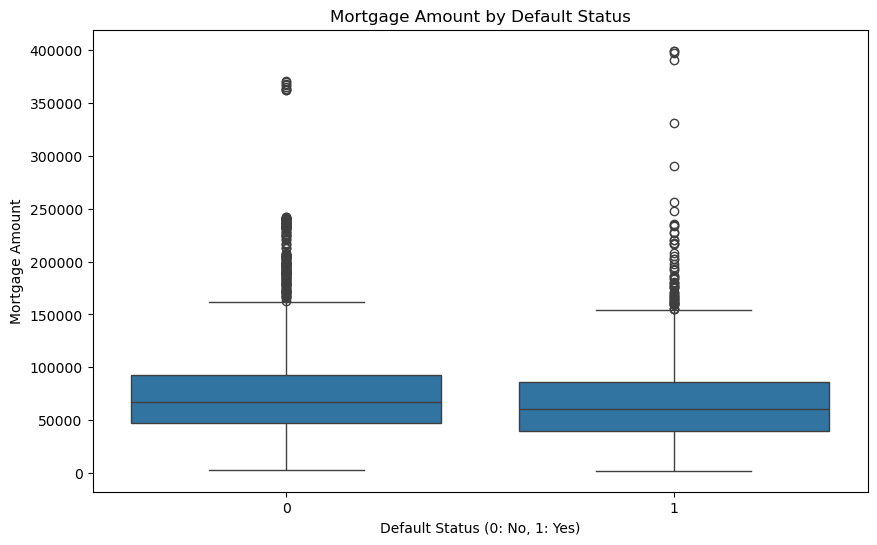

T-statistic: nan, P-value: nan


In [38]:
# Boxplot for mortgage amounts by default status
plt.figure(figsize=(10, 6))
sns.boxplot(x='BAD', y='MORTDUE', data=data)
plt.title('Mortgage Amount by Default Status')
plt.xlabel('Default Status (0: No, 1: Yes)')
plt.ylabel('Mortgage Amount')
plt.show()

# Perform a t-test (optional, if you want to test for statistical significance)
mortgage_default = data[data['BAD'] == 1]['MORTDUE']
mortgage_repaid = data[data['BAD'] == 0]['MORTDUE']

t_stat_mortgage, p_value_mortgage = ttest_ind(mortgage_default, mortgage_repaid)
print(f"T-statistic: {t_stat_mortgage}, P-value: {p_value_mortgage}")

## Treating Outliers

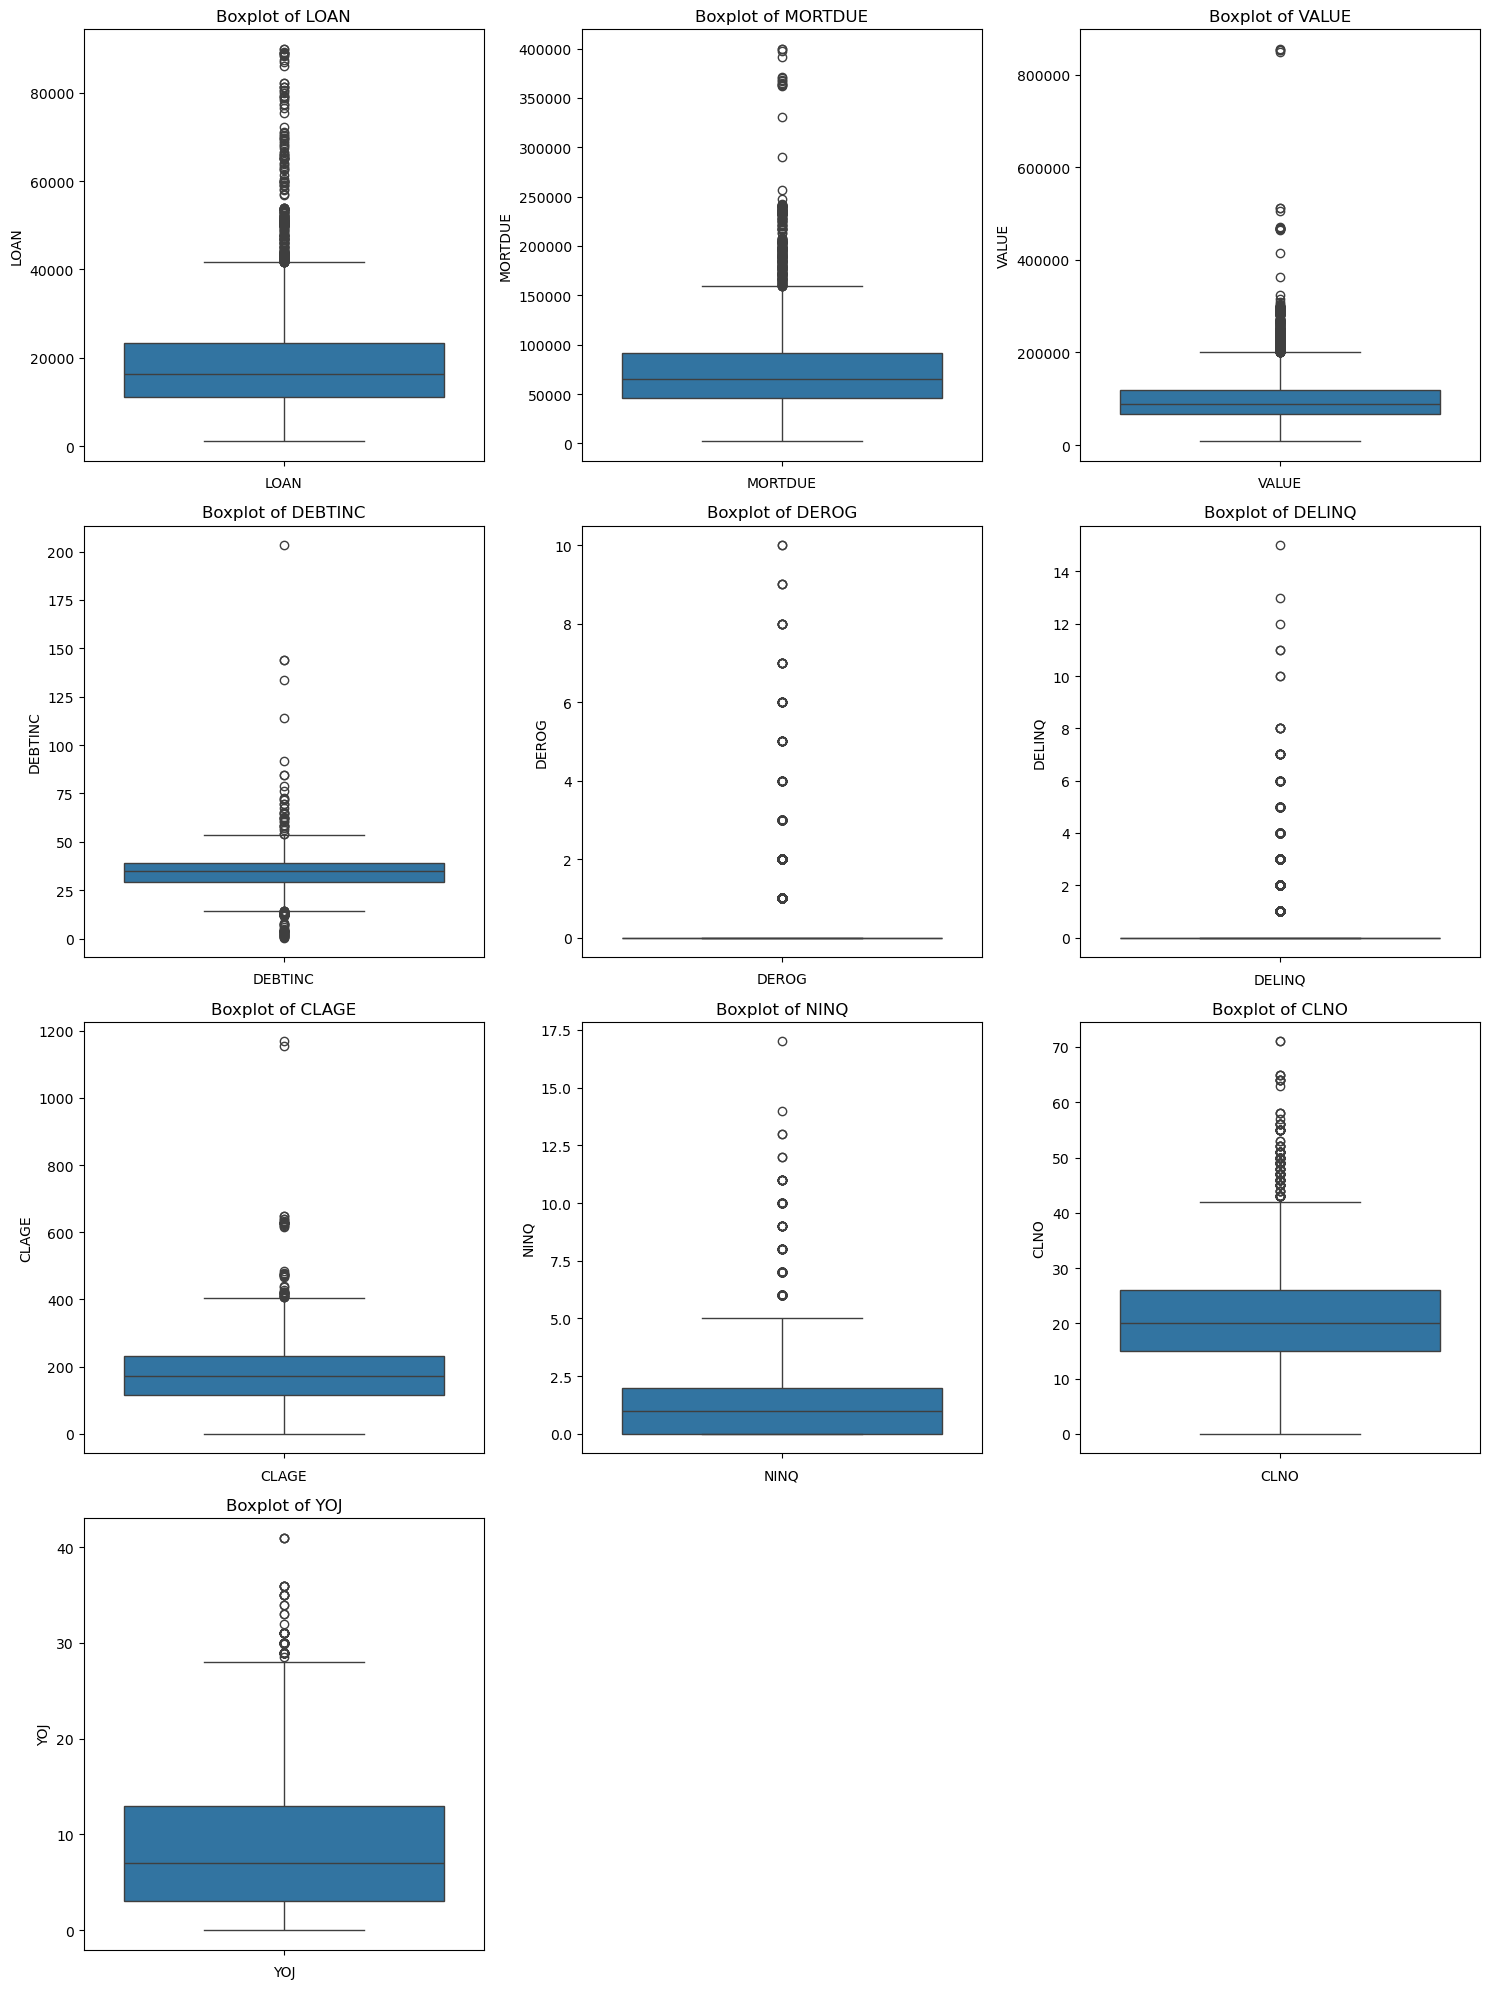

In [39]:
# List of numerical columns to analyze
numeric_columns = ['LOAN', 'MORTDUE', 'VALUE', 'DEBTINC', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'YOJ']

# Set the figure size for better readability
plt.figure(figsize=(15, 20))

# Loop through the numerical columns and create a boxplot for each
for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 3, i + 1)  # 4 rows, 3 columns for boxplots
    sns.boxplot(data[variable], whis=1.5)  # 'whis=1.5' for 1.5*IQR method of detecting outliers
    plt.title(f'Boxplot of {variable}')
    plt.xlabel(variable)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

## Treating Missing Values

In [40]:
# Impute missing values in 'MORTDUE' using the median
median_mortdue = data['MORTDUE'].median()
data['MORTDUE'].fillna(median_mortdue, inplace=True)

In [41]:
# Impute missing values in 'VALUE' using the median
median_value = data['VALUE'].median()
data['VALUE'].fillna(median_value, inplace=True)

In [42]:
# For categorical 'REASON', fill missing values with 'Unknown'
data['REASON'].fillna('Unknown', inplace=True)

In [43]:
# Impute missing values in 'JOB' using the mode
mode_job = data['JOB'].mode()[0]  # mode() returns a series, so we take the first value
data['JOB'].fillna(mode_job, inplace=True)

In [44]:
# Impute missing values in 'YOJ' using the median
median_yoj = data['YOJ'].median()
data['YOJ'].fillna(median_yoj, inplace=True)

In [45]:
# Impute missing values in 'DEROG' using the median
median_derog = data['DEROG'].median()
data['DEROG'].fillna(median_derog, inplace=True)

In [46]:
# Impute missing values in 'DELINQ' using the median
median_delinq = data['DELINQ'].median()
data['DELINQ'].fillna(median_delinq, inplace=True)

In [47]:
# Impute missing values in 'CLAGE' using the median
median_clage = data['CLAGE'].median()
data['CLAGE'].fillna(median_clage, inplace=True)

In [48]:
# Impute missing values in 'NINQ' using the median
median_ninq = data['NINQ'].median()
data['NINQ'].fillna(median_ninq, inplace=True)

In [49]:
# Impute missing values in 'CLNO' using the median (since it's still moderately skewed)
median_clno = data['CLNO'].median()
data['CLNO'].fillna(median_clno, inplace=True)

In [50]:
# Drop the 'DEBTINC' column
data.drop(columns=['DEBTINC'], inplace=True)

In [51]:
data.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
dtype: int64

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

* Loan, Amount Due, Current Value of the Property, Number of Major Derogatory Reports, Number of Delinquent Credit Lines, Age of the oldest Credit line in months, Number of recent credit inquiries, and Debt-to-income ratio are all highly positively skewed (greater than 1).
* Years at present job and Number of existing credit lines aren't greater than 1 but are still greater than 0.5, so none of the variables can be assumed to have a normal distribution.
* "Other" is the most common job at 44.7%, followed by ProfExe at 21.4%.
* The most common reason for taking the loan is Debt consolidation; over 65.9% of the loans are taken for that reason. Apart from this, the only other two reasons are Home Improvement and Unknown Reasons.
* Years at Present Job, Number of Major Derogatory Reports, Number of Delinquent Credit Lines, and Number of recent credit inquiries have a median of 0. This tells us that people most likely to take a loan normally don't have a history of bad credit and are often unemployed.
* Debt consolidation loans tend to have a lower default rate, while home improvement loans have a slightly higher one. The "Unknown" category falls in between.
* The loan amounts for defaulted applicants are, on average, significantly lower than those for applicants who repaid their loans.
* Current Value of the Property and Amount Due are strongly correlated. Some weak correlation can be seen between variables, but nothing significant.
* The Amount Due does significantly differ between defaulters and non-defaulters, with defaulters typically having lower mortgage amounts.
* There are outliers present in the data; however, we are going to let them be since none of them seem to be impossible values and their presence doesn't affect our Decision Tree or Random Forest algorithms.
* Since the skew is high for most numerical variables, we are going to treat the missing values by replacing them with the median values. For our two categorical variables, we already have an "other" category in the Job column, which we are going to use. As for the Reason for the loan, we are going to make a new variable called "unknown" and use it to group the missing values.

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

### Logistic Regression

In [56]:
# Define the target variable (dependent variable)
target = 'BAD'

# Define feature variables (independent variables)
features = ['LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO']

# Prepare the data for modeling
X = data[features]  # Feature variables
Y = data[target]    # Target variable

# Convert categorical variables using One-Hot Encoding (for 'REASON' and 'JOB')
X = pd.get_dummies(X, drop_first=True)  # drop_first=True avoids multicollinearity

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [57]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
logreg = LogisticRegression(max_iter=1000)  # max_iter=1000 ensures convergence for large datasets

# Train the model on the scaled training data
logreg.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000)

In [59]:
# Make predictions on the test data
Y_pred = logreg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8328


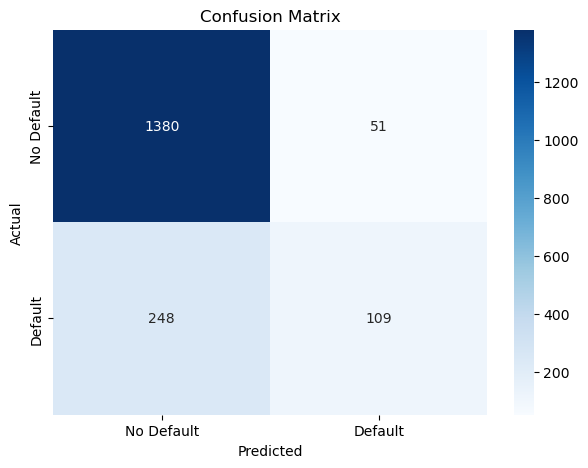

In [60]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [61]:
# Classification Report
cr = classification_report(Y_test, Y_pred)
print('Classification Report:')
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1431
           1       0.68      0.31      0.42       357

    accuracy                           0.83      1788
   macro avg       0.76      0.63      0.66      1788
weighted avg       0.81      0.83      0.81      1788



In [62]:
# Display coefficients (feature importance)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})
print(coefficients)

           Feature  Coefficient
0             LOAN    -0.253679
1          MORTDUE    -0.208809
2            VALUE     0.162937
3              YOJ    -0.075446
4            DEROG     0.481560
5           DELINQ     0.832977
6            CLAGE    -0.470406
7             NINQ     0.287627
8             CLNO    -0.096721
9   REASON_HomeImp     0.139912
10  REASON_Unknown    -0.018683
11      JOB_Office    -0.248653
12       JOB_Other    -0.021783
13     JOB_ProfExe    -0.060809
14       JOB_Sales     0.168772
15        JOB_Self     0.111749


In [63]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],               # Regularization type
    'solver': ['liblinear', 'saga'],       # Solvers that support 'l1' penalty
    'max_iter': [100, 200, 300]            # Maximum number of iterations for solver
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, Y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_logreg = grid_search.best_estimator_
best_logreg.fit(X_train_scaled, Y_train)

# Make predictions with the tuned model
Y_tuned_pred = best_logreg.predict(X_test_scaled)

Best parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [64]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_tuned_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8322


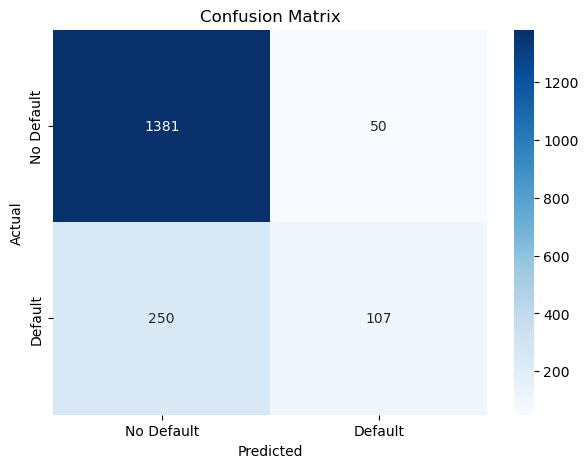

In [65]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_tuned_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [66]:
# Classification Report
cr = classification_report(Y_test, Y_tuned_pred)
print('Classification Report:')
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1431
           1       0.68      0.30      0.42       357

    accuracy                           0.83      1788
   macro avg       0.76      0.63      0.66      1788
weighted avg       0.81      0.83      0.81      1788



### Decision Tree

In [67]:
X = data.drop(["BAD"], axis=1) 
# Status is the dropped since it is a target variable and ID does not provide any information 
# since it is distinct for each record so that can also be dropped
Y = data["BAD"]

X = pd.get_dummies(X)

# Splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y
)

print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (4172, 18)
Shape of test set :  (1788, 18)
Percentage of classes in training set:
BAD
0    0.800575
1    0.199425
Name: proportion, dtype: float64
Percentage of classes in test set:
BAD
0    0.800336
1    0.199664
Name: proportion, dtype: float64


In [68]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Training Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



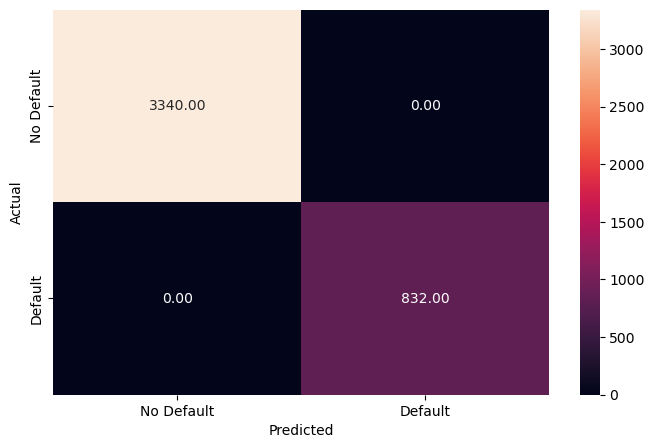

None


In [69]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state=1)
d_tree.fit(x_train, y_train)

# Checking performance on the training data
y_pred_train1 = d_tree.predict(x_train)

# Evaluate the performance
accuracy_train1 = accuracy_score(y_train, y_pred_train1)  # Calculate accuracy
print(f"Training Accuracy: {accuracy_train1:.4f}")

# Performance of the Model
print(metrics_score(y_train, y_pred_train1))

Test Accuracy: 0.8809
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1431
           1       0.74      0.62      0.68       357

    accuracy                           0.88      1788
   macro avg       0.82      0.78      0.80      1788
weighted avg       0.88      0.88      0.88      1788



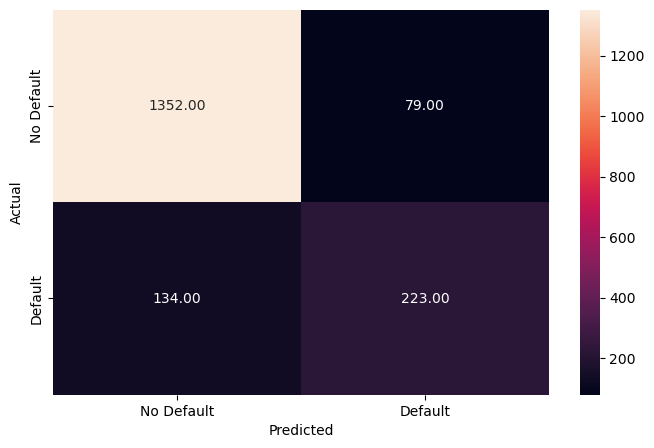

None


In [70]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(x_test)  # Make predictions on the test data

# Evaluate the performance
accuracy_test1 = accuracy_score(y_test, y_pred_test1)  # Calculate accuracy
print(f"Test Accuracy: {accuracy_test1:.4f}")

# Performance of the Model
print(metrics_score(y_test, y_pred_test1))

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [71]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(2, 15), 
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [5, 10, 20, 25, 30],
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for each split
    'min_samples_split': [2, 5, 10, 20],  # Minimum number of samples to split a node
    'max_leaf_nodes': [None, 10, 20, 50],  # Maximum number of leaf nodes
    'splitter': ['best', 'random'],  # Splitting strategy
    'min_impurity_decrease': [0.0, 0.1, 0.2]  # Minimum impurity decrease required to split a node
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=14,
                       max_features='auto', min_samples_leaf=5, random_state=7)

Training Accuracy: 0.8806
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3340
           1       0.67      0.80      0.73       832

    accuracy                           0.88      4172
   macro avg       0.81      0.85      0.83      4172
weighted avg       0.89      0.88      0.88      4172



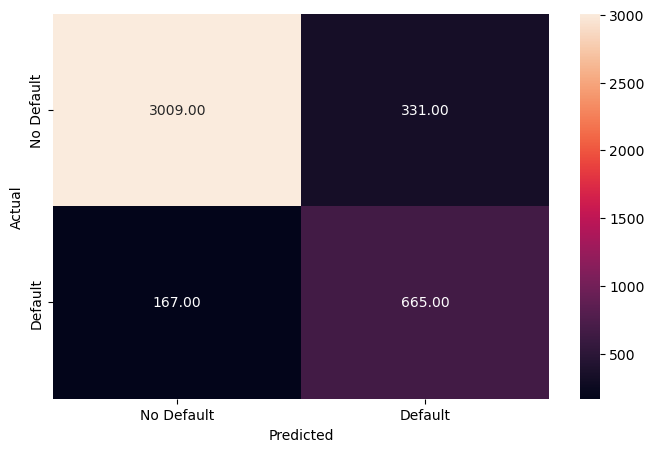

None


In [72]:
# Checking performance on the training data using the best model
y_pred_train2 = d_tree_tuned.predict(x_train)

# Evaluate the performance
accuracy_train2 = accuracy_score(y_train, y_pred_train2)  # Calculate accuracy
print(f"Training Accuracy: {accuracy_train2:.4f}")

# Performance of the Model
print(metrics_score(y_train, y_pred_train2))

Test Accuracy: 0.8115
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1431
           1       0.52      0.59      0.56       357

    accuracy                           0.81      1788
   macro avg       0.71      0.73      0.72      1788
weighted avg       0.82      0.81      0.82      1788



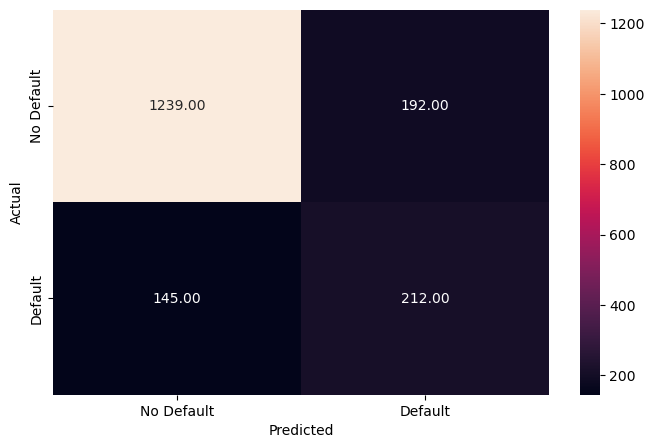

None


In [73]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(x_test)  # Make predictions on the test data

# Evaluate the performance
accuracy_test2 = accuracy_score(y_test, y_pred_test2)  # Calculate accuracy
print(f"Test Accuracy: {accuracy_test2:.4f}")

# Performance of the Model
print(metrics_score(y_test, y_pred_test2))

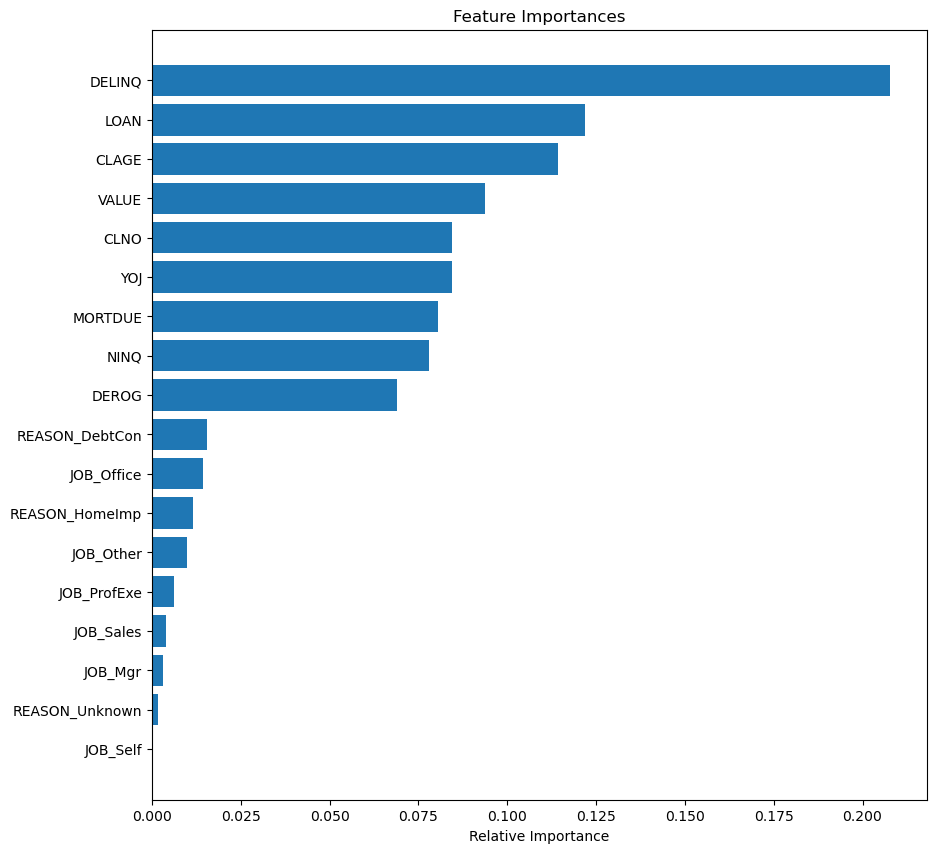

In [74]:
# Plotting the feature importance
features = list(X.columns)

importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [75]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state=1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

Training Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



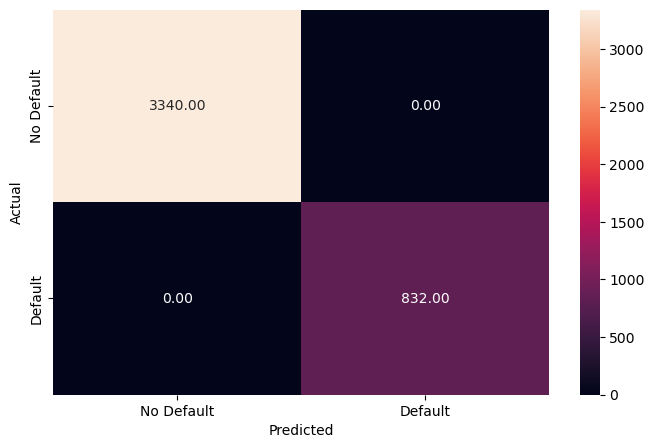

None


In [76]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(x_train)  # Use the trained Random Forest model to predict on the training data

# Evaluate the performance
accuracy_train3 = accuracy_score(y_train, y_pred_train3)  # Calculate accuracy
print(f"Training Accuracy: {accuracy_train3:.4f}")

# Performence of the model
print(metrics_score(y_train, y_pred_train3))

Test Accuracy: 0.9217
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1431
           1       0.97      0.62      0.76       357

    accuracy                           0.92      1788
   macro avg       0.94      0.81      0.86      1788
weighted avg       0.93      0.92      0.91      1788



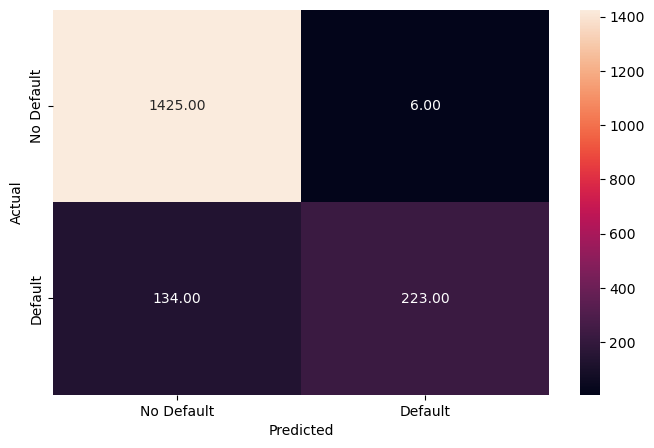

None


In [77]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(x_test)  # Use the trained Random Forest model to predict on the test data

# Evaluate the performance
accuracy_test3 = accuracy_score(y_test, y_pred_test3)  # Calculate accuracy
print(f"Test Accuracy: {accuracy_test3:.4f}")

# Performence of the model
print(metrics_score(y_test, y_pred_test3))

### **Random Forest Classifier Hyperparameter Tuning**

In [79]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150],           # Reduced number of estimators
    "max_depth": [5, 6, 7],                # Reduced tree depth
    "min_samples_leaf": [10, 20],          # Fewer options for leaf samples
    "max_features": [0.7, 0.8],            # Reduced max features range
    "max_samples": [0.9],                  # Fewer options for max_samples
    "class_weight": ["balanced"],          # Fewer options for class weight
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)

grid_obj = grid_obj.fit(x_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=0.7, max_samples=0.9,
                       min_samples_leaf=20, random_state=7)

Training Accuracy: 0.8298
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      3340
           1       0.55      0.77      0.64       832

    accuracy                           0.83      4172
   macro avg       0.74      0.81      0.77      4172
weighted avg       0.86      0.83      0.84      4172



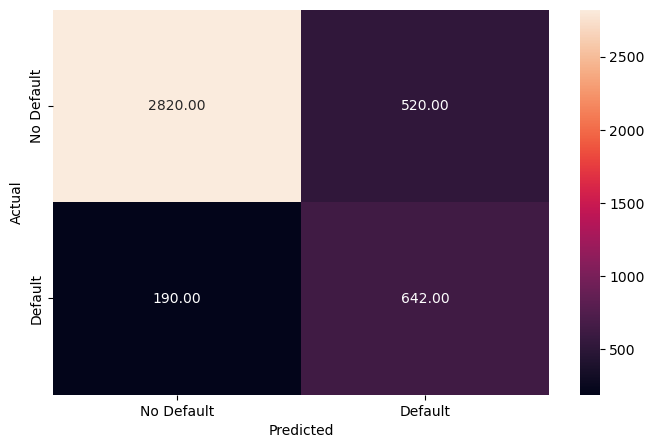

None


In [80]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(x_train)  # Use the tuned Random Forest model to predict on the training data

# Evaluate the performance
accuracy_train4 = accuracy_score(y_train, y_pred_train4)  # Calculate accuracy
print(f"Training Accuracy: {accuracy_train4:.4f}")

# Performence of the model
print(metrics_score(y_train, y_pred_train4))

Test Accuracy: 0.7998
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1431
           1       0.50      0.67      0.57       357

    accuracy                           0.80      1788
   macro avg       0.70      0.75      0.72      1788
weighted avg       0.83      0.80      0.81      1788



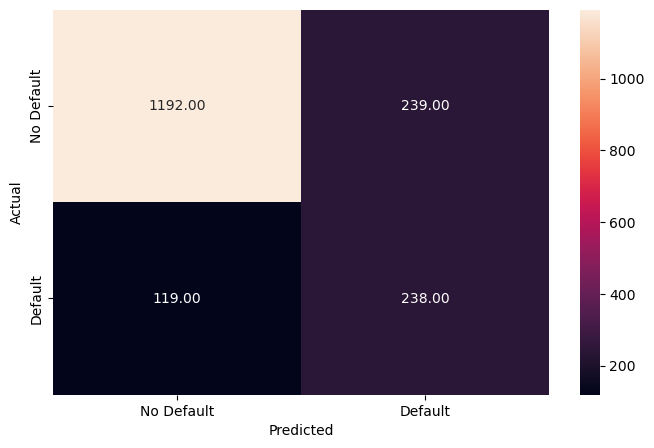

None


In [81]:
# Checking performance on the test data
y_pred_test4 = rf_estimator_tuned.predict(x_test)  # Use the tuned Random Forest model to predict on the test data

# Evaluate the performance
accuracy_test4 = accuracy_score(y_test, y_pred_test4)  # Calculate accuracy
print(f"Test Accuracy: {accuracy_test4:.4f}")

# Performence of the model
print(metrics_score(y_test, y_pred_test4))

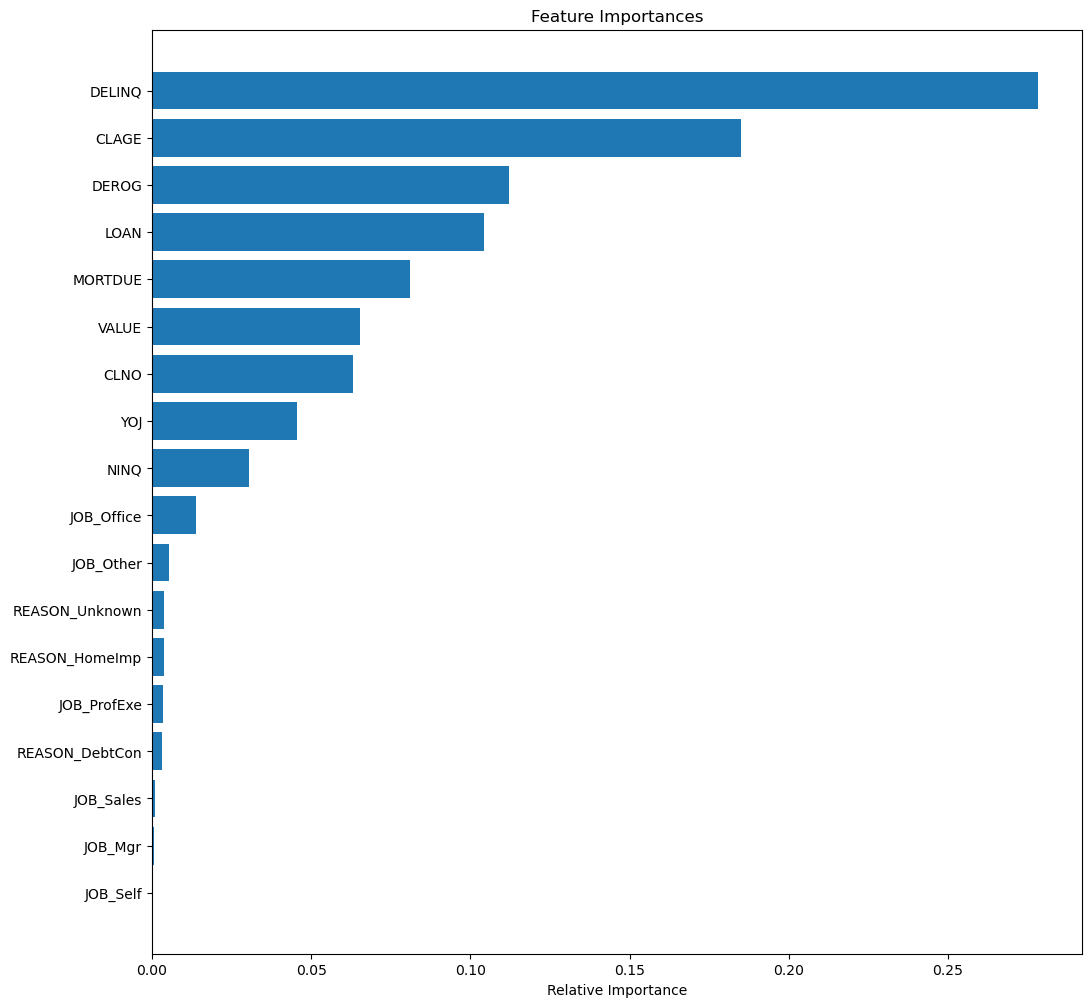

In [82]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **XGBoost Model**

In [83]:
# Example: Assuming data is already preprocessed and cleaned

# Define the features and target variable
X = data.drop(columns=['BAD'])  # Assuming 'BAD' is the target variable
Y = data['BAD']

X = pd.get_dummies(X)

# Split the data into training and testing sets (70:30 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (4172, 18)
Shape of X_test: (1788, 18)


Accuracy: 0.9200
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1431
           1       0.93      0.65      0.76       357

    accuracy                           0.92      1788
   macro avg       0.92      0.82      0.86      1788
weighted avg       0.92      0.92      0.91      1788



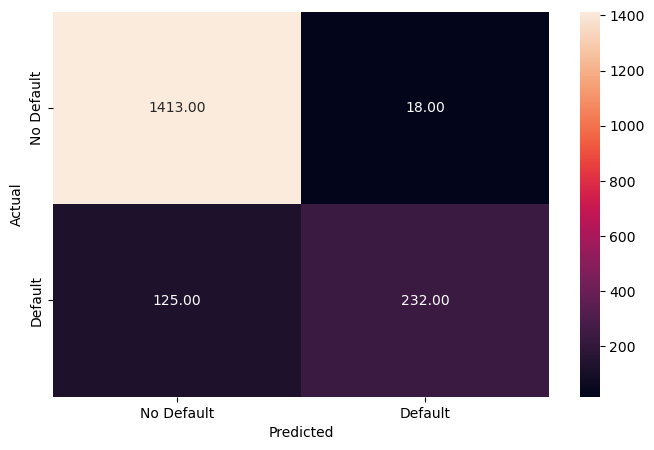

None


In [85]:
# Create the XGBoost model
xg_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

# Fit the model to the training data
xg_clf.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = xg_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix and Classification Report
print(metrics_score(Y_test, y_pred))

In [86]:
# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Set up the XGBoost model
xg_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xg_clf, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}


Accuracy after tuning: 0.9306
Recall after tuning: 0.6919
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1431
           1       0.95      0.69      0.80       357

    accuracy                           0.93      1788
   macro avg       0.94      0.84      0.88      1788
weighted avg       0.93      0.93      0.93      1788



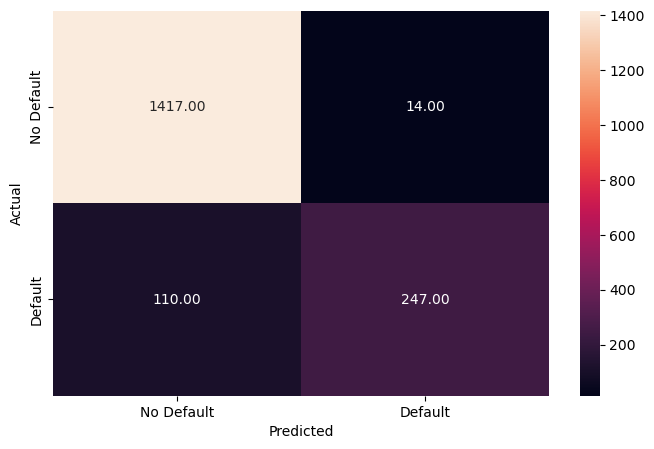

None


In [87]:
# Predict on the test set using the best model after tuning
y_pred_best = best_model.predict(X_test)

# # Evaluate the model
accuracy_best = accuracy_score(Y_test, y_pred_best)
recall_best = recall_score(Y_test, y_pred_best)

print(f'Accuracy after tuning: {accuracy_best:.4f}')
print(f'Recall after tuning: {recall_best:.4f}')

# Confusion Matrix and Classification Report
print(metrics_score(Y_test, y_pred_best))

In [88]:
# Set up the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Set up the XGBoost model
xg_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

# Perform RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(estimator=xg_clf, param_distributions=param_dist, cv=5, scoring='recall', n_jobs=-1, verbose=2)

# Fit the random search to the data
random_search.fit(X_train, Y_train)

# Get the best parameters and best estimator
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

print(f'Best Parameters from RandomizedSearchCV: {best_params_random}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters from RandomizedSearchCV: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


Accuracy after tuning: 0.9306
Recall after tuning: 0.6919
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1431
           1       0.95      0.69      0.80       357

    accuracy                           0.93      1788
   macro avg       0.94      0.84      0.88      1788
weighted avg       0.93      0.93      0.93      1788



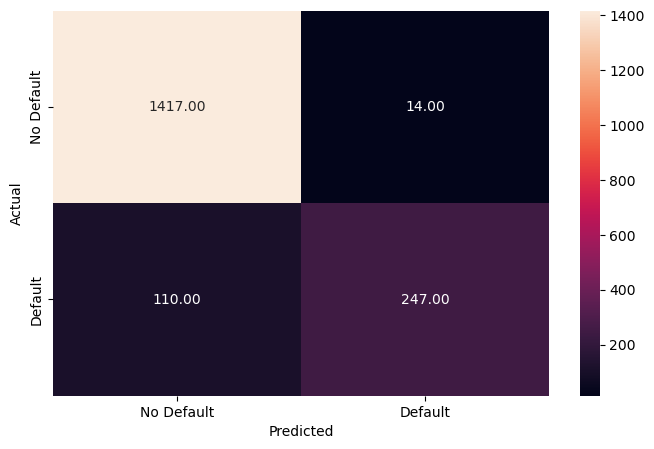

None


In [89]:
# Predict on the test set using the best model after tuning
y_pred_best = best_model.predict(X_test)

# # Evaluate the model
accuracy_best = accuracy_score(Y_test, y_pred_best)
recall_best = recall_score(Y_test, y_pred_best)

print(f'Accuracy after tuning: {accuracy_best:.4f}')
print(f'Recall after tuning: {recall_best:.4f}')

# Confusion Matrix and Classification Report
print(metrics_score(Y_test, y_pred_best))

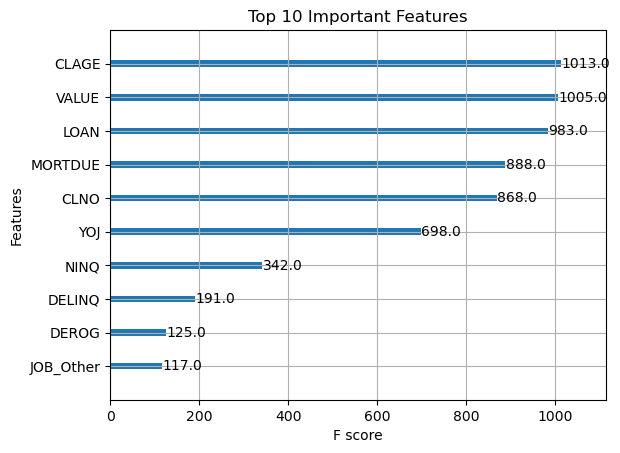

In [90]:
# Get feature importances
xgb.plot_importance(best_model, max_num_features=10, importance_type='weight', title="Top 10 Important Features")
plt.show()

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?